# Representações de dados para redes neurais

### Scalars (rank-0 tensors)

Um tensor que contém apenas um número é chamado de escalar. No NumPy, um número float32 ou float64 é um tensor escalar (ou matriz escalar)

In [1]:
import numpy as np

In [2]:
x = np.array(12)
x

array(12)

In [3]:
x.ndim

0

### Vectors (rank-1 tensors)

Uma matriz de números é chamada de vetor, ou tensor de classificação 1, ou tensor 1D. Um tensor de classificação 1 tem exatamente um eixo

In [4]:
x = np.array([12, 3, 6, 14, 7])
x

array([12,  3,  6, 14,  7])

In [5]:
x.ndim

1

In [6]:
x.shape

(5,)

### Matrices (rank-2 tensors)

Uma matriz de vetores é uma matriz, ou tensor de classificação 2. Uma matriz tem dois eixos, ou seja, linhas e colunas

In [7]:
x = np.array([[5, 78, 2, 34, 0],
              [6, 79, 3, 35, 1],
              [7, 80, 4, 36, 2]])

x

array([[ 5, 78,  2, 34,  0],
       [ 6, 79,  3, 35,  1],
       [ 7, 80,  4, 36,  2]])

In [8]:
x.ndim

2

In [9]:
x.shape

(3, 5)

### Rank-3 and higher-rank tensors

Empacotar matrizes em uma nova matriz obterá um tensor de classificação 3 (ou tensor 3D)

In [10]:
x = np.array([[[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]],
              [[5, 78, 2, 34, 0],
               [6, 79, 3, 35, 1],
               [7, 80, 4, 36, 2]]])

x

array([[[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]],

       [[ 5, 78,  2, 34,  0],
        [ 6, 79,  3, 35,  1],
        [ 7, 80,  4, 36,  2]]])

In [11]:
x.ndim

3

In [12]:
x.shape

(3, 3, 5)

----

In [14]:
from tensorflow.keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

In [15]:
train_images.ndim

3

In [16]:
train_images.shape

(60000, 28, 28)

In [17]:
train_images.dtype

dtype('uint8')

Portanto, temos um tensor de classificação 3 de inteiros de 8 bits. Mais precisamente uma série de 60.000 matrizes de inteiros 28 × 28. Cada uma dessas matrizes é uma imagem em tons de cinza, com coeficientes entre 0 e 255

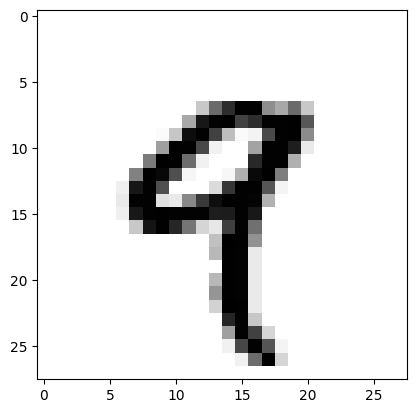

In [18]:
import matplotlib.pyplot as plt
digit = train_images[4]
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()

In [19]:
train_labels[4]

np.uint8(9)

### Manipulando Tensors

In [20]:
slicing = train_images[10:100]
slicing.shape

(90, 28, 28)

In [21]:
my_slice = train_images[:, 14:, 14:] # é útil para tarefas como recorte de regiões de interesse em imagens antes de processá-las em redes neurais
my_slice.shape

(60000, 14, 14)

### Batches

Os modelos de aprendizagem profunda não processam um conjunto de dados inteiro de uma só vez, eles dividem os dados em pequenos lotes

In [22]:
batch = train_images[:128]
batch2 = train_images[128:256]

### Tipos de Dados

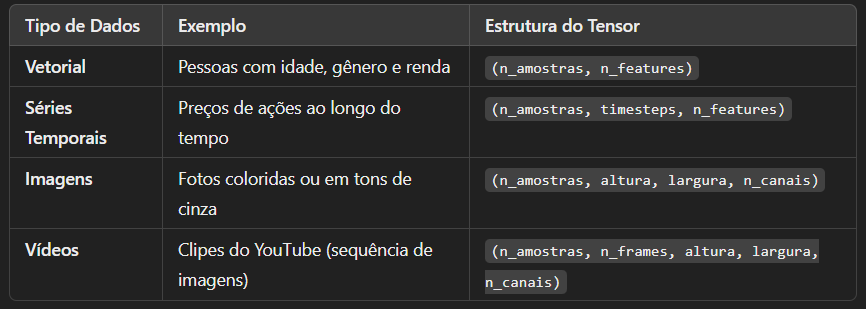

### Operações com Tensores